### Import Required Libraries

In [1]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Graphic Draw

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/cancer-data/Cancer_Data.csv


# Breast Cancer Prediction using Logistic Regression

<div>
<img src="https://images.squarespace-cdn.com/content/v1/57b21b67197aea37dfb7c157/1571627836034-6ZHK0AKBX1EY14OVRWYN/Breast-Cancer-Ribbon-PNG-Image.png" width="500"/>
</div>

# 1. Summary

This notebook aims to utilize a machine learning model to predict whether breast cancer patients have malignant or benign tumors. By analyzing various medical and diagnostic data, the model will be trained to distinguish between the two types of cancer, potentially aiding in early detection and treatment decisions. The implementation of this predictive tool could provide significant benefits in clinical settings, improving the accuracy and speed of diagnosis for breast cancer patients.

**If you find this notebook helpful, please upvote and consider reviewing some of my other work.**

I learn from your feedback 🙂

*Some information about this dataset follows:*

### 🦠 **Breast Cancer Data Set**
This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

### 📚 **The main features of the dataset are as follows:**
* **id:** Represents a unique ID of each patient.
* **diagnosis:** Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).
* **radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean:** Represents the mean values of the cancer's visual characteristics.
* There are also several categorical features where patients in the dataset are labeled with numerical values. You can examine them in the Chart area.

Other features contain specific ranges of average values of the features of the cancer image:

* **radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean**
Each of these features is mapped to a table containing the number of values in a given range. You can examine the Chart Tables

**Each sample contains the patient's unique ID, the cancer diagnosis and the average values of the cancer's visual characteristics.**

**Such a dataset can be used to train or test models and algorithms used to make cancer diagnoses. Understanding and analyzing the dataset can contribute to the improvement of cancer-related visual features and diagnosis.**

### 💖 **Acknowledgements and Information**

This database has been elaborated for educational purposes and published to reach more people, you can access the original source from the link below, please do not forget to support that data

🔗 https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

This database can also be accessed via the UW CS ftp server:

🔗 ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

It can also be found at the UCI Machine Learning Repository:

🔗 https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

*Thankyou Erdem Taha for uploading the dataset.*


# 2. Exploratory Data Analysis

<div>
<img src="https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/file-uploads/blogs/2147632269/images/a534dff-365c-a82d-ef36-3abb31d50_analytics_4.png" width="500"/>
</div>

### EDA ELI5
Exploratory Data Analysis (EDA) for this breast cancer dataset involves a thorough examination of the data to uncover patterns, spot anomalies, and test hypotheses. This process includes visualizing the distribution of key features, and understanding their relationships with the target variable, which indicates whether the cancer is malignant or benign. Techniques such as histograms, and box plots are employed to summarize the data's central tendencies and variability. EDA helps in selecting and engineering the most relevant features, ultimately enhancing the performance of the machine learning model.

## 2.1 Import Dataset

I start by reading the csv file into a Pandas DataFrame for analysis.

In [2]:
df = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')

## 2.2 Preliminary Investigation

I describe the dataset to get an idea of the distribution of data. I'm also looking for any columns that might contain useless or erroneous data.

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


I examine the different data types from each column. I'm also looking for null values at this stage. Notice that the column Unnamed: 32 contains all null values. I will make a note to remove this column before analysis. 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

I'll look at the first 5 columns to get an idea of the type of data collected. 

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2.3 Categorical Variables

Confirm categorical variables. In this dataset there is only one - the target variable, diagnosis. 

In [6]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['diagnosis']


## 2.4 Numerical Variables

The rest of the columns are numerical variables.

In [7]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 32 numerical variables

The numerical variables are : ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


I examine the first 5 rows of numerical variables and see 2 columns that might not be necessary. There is the Unnamed: 32 column that we identified before, and the id column will also be unnecessary for analysis. If I leave the id column in, it could introduce bias into my model that would not be logical for this dataset. There is no way that the patient id could be a logical predictor as to whether breast cancer is benign or malignant.

In [8]:
# view the numerical variables

df[numerical].head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2.5 Finding Outliers

I want to desribe each of the numerical features to see if I can spot any features that might have obvious outliers.

In [9]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

                id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count        569.0        569.0         569.0           569.0      569.0   
mean    30371831.0         14.0          19.0            92.0      655.0   
std    125020586.0          4.0           4.0            24.0      352.0   
min         8670.0          7.0          10.0            44.0      144.0   
25%       869218.0         12.0          16.0            75.0      420.0   
50%       906024.0         13.0          19.0            86.0      551.0   
75%      8813129.0         16.0          22.0           104.0      783.0   
max    911320502.0         28.0          39.0           188.0     2501.0   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count            569.0             569.0           569.0                569.0   
mean               0.0               0.0             0.0                  0.0   
std                0.0               0.0             0.0                

## 2.6 Visualizing Outliers

I'm interested in the area_mean, area_worst, perimeter_mean, and perimeter_worst columns. They appear to have outliers from the descriptions.

Text(0, 0.5, 'Perimeter Worst')

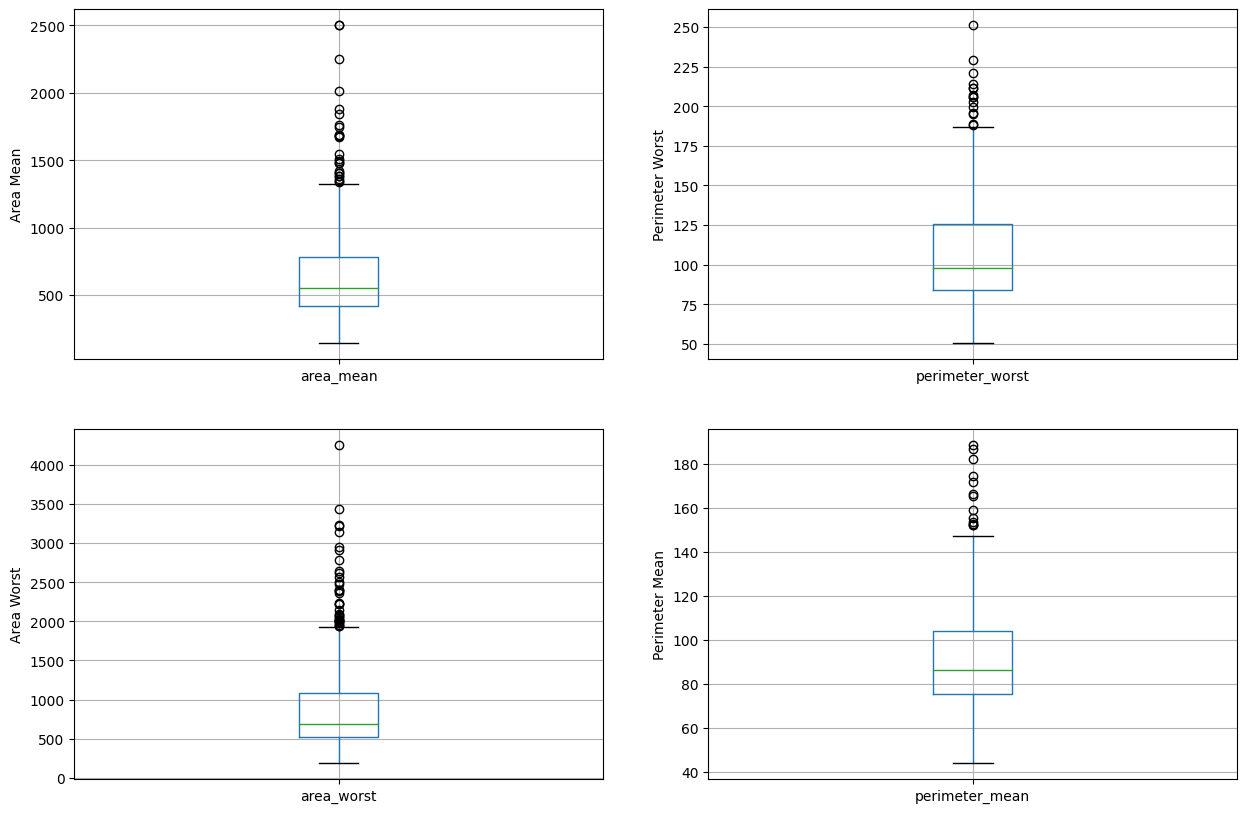

In [10]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='area_mean')
fig.set_title('')
fig.set_ylabel('Area Mean')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='area_worst')
fig.set_title('')
fig.set_ylabel('Area Worst')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='perimeter_mean')
fig.set_title('')
fig.set_ylabel('Perimeter Mean')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='perimeter_worst')
fig.set_title('')
fig.set_ylabel('Perimeter Worst')

The suspected outliers are more obvious when these features are visualized using box plots. We can see some values floating away from the clustered distribution in area_mean, perimeter_worst, and area_worst. The outliers that may exist in perimeter_mean are less obvious. I'll investigate some more.

I'll plot each of the above 4 features into histograms to visualize their distribution in another way.

Text(0, 0.5, 'Diagnosis')

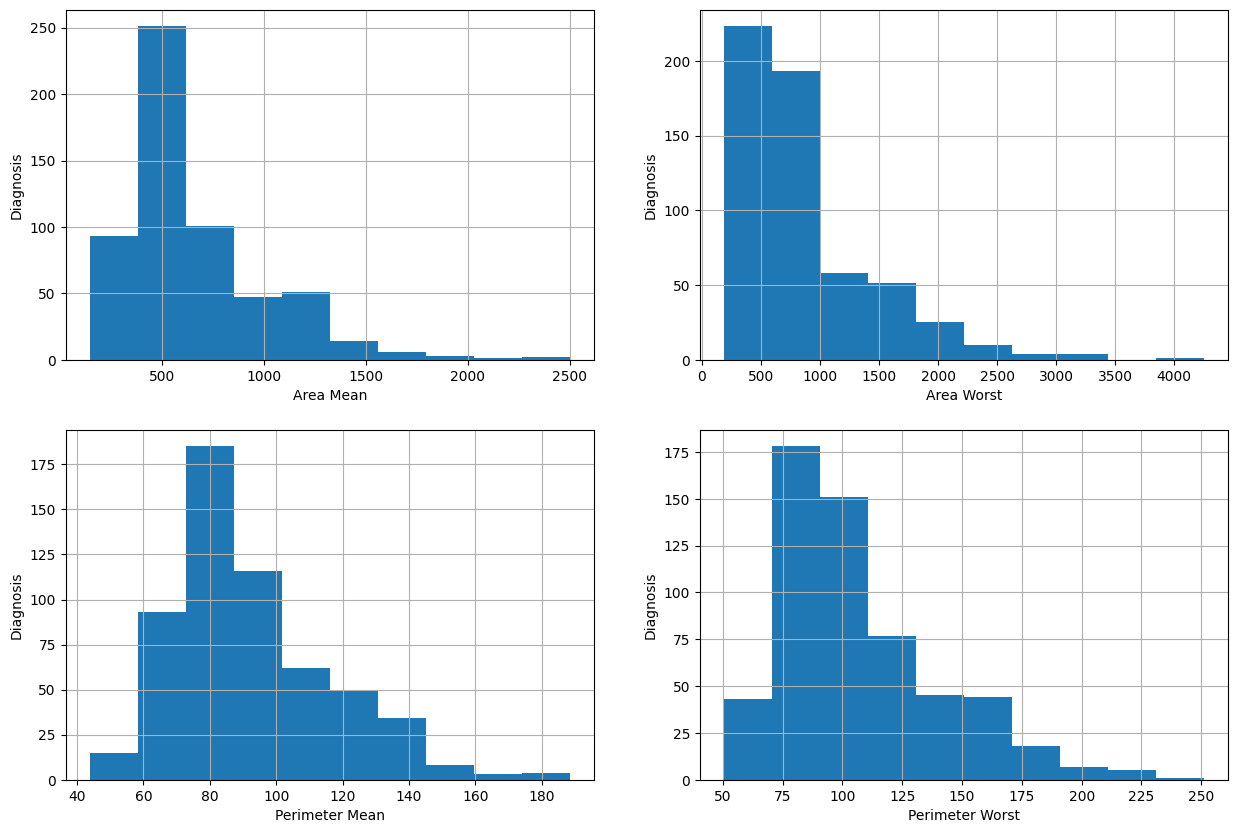

In [11]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.area_mean.hist(bins=10)
fig.set_xlabel('Area Mean')
fig.set_ylabel('Diagnosis')


plt.subplot(2, 2, 2)
fig = df.area_worst.hist(bins=10)
fig.set_xlabel('Area Worst')
fig.set_ylabel('Diagnosis')


plt.subplot(2, 2, 3)
fig = df.perimeter_mean.hist(bins=10)
fig.set_xlabel('Perimeter Mean')
fig.set_ylabel('Diagnosis')


plt.subplot(2, 2, 4)
fig = df.perimeter_worst.hist(bins=10)
fig.set_xlabel('Perimeter Worst')
fig.set_ylabel('Diagnosis')

I think this shows the outliers in each feature a bit more closely.

## 2.7 Categorizing Outliers

I want to determine an acceptable upper and lower boundary for each features and eliminate the largest outliers. I can do that in a few lines of code for each feature.

In [12]:
# find outliers for area_mean variable

IQR = df.area_mean.quantile(0.75) - df.area_mean.quantile(0.25)
Lower_fence = df.area_mean.quantile(0.25) - (IQR * 3)
Upper_fence = df.area_mean.quantile(0.75) + (IQR * 3)
print('Area Mean outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Area Mean outliers are values < -666.9000000000001 or > 1869.9


In [13]:
# find outliers for area_mean variable

IQR = df.area_worst.quantile(0.75) - df.area_worst.quantile(0.25)
Lower_fence = df.area_worst.quantile(0.25) - (IQR * 3)
Upper_fence = df.area_worst.quantile(0.75) + (IQR * 3)
print('Area Worst outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Area Worst outliers are values < -1190.8000000000002 or > 2790.1000000000004


In [14]:
# find outliers for area_mean variable

IQR = df.perimeter_mean.quantile(0.75) - df.perimeter_mean.quantile(0.25)
Lower_fence = df.perimeter_mean.quantile(0.25) - (IQR * 3)
Upper_fence = df.perimeter_mean.quantile(0.75) + (IQR * 3)
print('Perimeter Mean outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Perimeter Mean outliers are values < -11.619999999999976 or > 190.89


In [15]:
# find outliers for area_mean variable

IQR = df.perimeter_worst.quantile(0.75) - df.perimeter_worst.quantile(0.25)
Lower_fence = df.perimeter_worst.quantile(0.25) - (IQR * 3)
Upper_fence = df.perimeter_worst.quantile(0.75) + (IQR * 3)
print('Perimeter Worst outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Perimeter Worst outliers are values < -39.76000000000002 or > 249.27000000000004


In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df.shape

(569, 33)

# 3. Feature Engineering

<div>
<img src="https://hystax.com/wp-content/uploads/2023/04/MLOps_Feature-engineering.png" width="500"/>
</div>

Feature engineering for this breast cancer dataset involves transforming raw data into meaningful features that improve the performance of the machine learning model. This process includes addressing outliers for the features identified above (area_mean, area_worst, perimeter_mean, and perimeter_worst). Scaling techniques are applied to ensure that all features contribute equally to the model. Additionally, handling missing values and encoding categorical variables are crucial steps. Effective feature engineering enhances the model's ability to accurately classify tumors as malignant or benign.

## 3.1 Drop Unnecessary Columns

I do another quick check for null values before proceeding. I know from the info collected earlier that there should not be any more nulls in my numerical features. This is confirmed below.

In [18]:
# check missing values in numerical variables

df[numerical].isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

I confirm that unnamed: 32 only contais NaN values. I will drop that column. I'm also going to drop the id column because it is not correlated to any of the features and might accidentally introduce bias into the model. 

In [19]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis] 

## 3.2 Separate the Features from the Target

I split the dataset into feature variables and target variable. The target variable (y) in this case is 'diagnosis' - malignant or benign. 

In [20]:
y = df.diagnosis

The features (X) in this case are all of the features except the ones we have dropped and the target (diagnosis).

In [21]:
X = df.drop(['diagnosis'], axis=1)

I convert each variable into a DataFrame before train, test, split.

In [22]:
pd.DataFrame(X)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
pd.DataFrame(y)

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


Taking a quick look at the features to ensure I am happy with the DataFrame.

In [24]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3.3 Train, Test, Split the Dataset

I split the X and y dataframes into X_training and testing sets and y_training and testing sets. 

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

I confirm the number of features in both sets is the same. I'm leaving the train_test_split to the default values of 75% training and 25% testing.

In [26]:
X_train.shape

(426, 30)

In [27]:
X_test.shape

(143, 30)

## 3.4 Addressing Outliers

I want to remove outliers from the features we identified earlier using the lower and upper boundaries we defined. I'll define a function to cap each of these features.

In [84]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['area_mean'] = max_value(df3, 'area_mean', 1869.9)
    df3['area_worst'] = max_value(df3, 'area_worst', 2790.1)
    df3['perimeter_mean'] = max_value(df3, 'perimeter_mean', 190.89)
    df3['perimeter_worst'] = max_value(df3, 'perimeter_worst', 249.27)

I define the max values for each of the four features for the training and testing set. 

In [86]:
print('The area_mean maxes are:')
X_train.area_mean.max(), X_test.area_mean.max()

The area_mean maxes are:


(1869.9, 1869.9)

In [87]:
print('The area_worst maxes are:')
X_train.area_worst.max(), X_test.area_worst.max()

The area_worst maxes are:


(2790.1, 2790.1)

In [88]:
print('The perimeter_mean maxes are:')
X_train.perimeter_mean.max(), X_test.perimeter_mean.max()

The perimeter_mean maxes are:


(188.5, 171.5)

In [89]:
print('The perimeter_worst maxes are:')
X_train.perimeter_worst.max(), X_test.perimeter_worst.max()

The perimeter_worst maxes are:


(249.27, 214.0)

I describe the dataframe again to ensure that the features have been capped. We confirm that the max values in each of the features listed are the same as the values printed above.

In [90]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.122664,19.198850,91.885023,650.740141,0.095556,0.102507,0.087470,0.047744,0.180024,0.062607,...,16.211859,25.506878,106.882254,866.780751,0.131202,0.247729,0.267698,0.112653,0.287797,0.083346
std,3.534740,4.230755,24.304457,338.524393,0.013971,0.051469,0.078612,0.037861,0.026818,0.007227,...,4.781609,6.026980,33.055217,535.236143,0.023224,0.149395,0.198973,0.064429,0.061577,0.017581
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.717500,16.180000,75.502500,421.650000,0.085193,0.062460,0.028973,0.020325,0.161425,0.057510,...,13.062500,21.037500,84.465000,520.700000,0.114200,0.141650,0.114425,0.063058,0.247775,0.070642
50%,13.270000,18.690000,85.935000,545.650000,0.094370,0.090505,0.061400,0.033065,0.178150,0.061295,...,14.965000,25.100000,97.665000,686.550000,0.130100,0.206250,0.225450,0.098095,0.281050,0.079870
75%,15.750000,21.587500,104.175000,780.400000,0.104275,0.130575,0.128775,0.070403,0.195375,0.065975,...,18.425000,29.490000,123.475000,1030.750000,0.145900,0.341175,0.382075,0.157250,0.315450,0.091838
max,28.110000,39.280000,188.500000,1869.900000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,249.270000,2790.100000,0.218400,0.937900,0.960800,0.291000,0.663800,0.173000


## 3.5 Feature Scaling

I define a variable to gather all of the features from the training set and fit them with MinMaXScaler to scale the whole DataFrame between the numbers 0 and 1. 

In [34]:
cols = X_train.columns

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [37]:
X_test = pd.DataFrame(X_test, columns=[cols])

After scaling, I describe the training set once more to ensure the values have been scaled. We can confirm that the max value for each feature is now 1.

In [38]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.314984,0.320894,0.312740,0.282636,0.387525,0.284661,0.204945,0.237297,0.338091,0.266360,...,0.275340,0.359458,0.268982,0.250606,0.407742,0.242079,0.278619,0.387124,0.258815,0.239962
std,0.173110,0.143076,0.172887,0.199191,0.126124,0.176250,0.184188,0.188176,0.143184,0.152217,...,0.174754,0.160634,0.169705,0.208547,0.157736,0.164061,0.207091,0.221404,0.121381,0.149042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197194,0.218803,0.196205,0.147838,0.293965,0.147524,0.067883,0.101019,0.238788,0.159014,...,0.160240,0.240338,0.153892,0.115761,0.292264,0.125586,0.119093,0.216692,0.179923,0.132269
50%,0.273226,0.303686,0.270415,0.220800,0.376817,0.243562,0.143861,0.164339,0.328083,0.238732,...,0.229771,0.348614,0.221660,0.180382,0.400258,0.196528,0.234648,0.337096,0.245515,0.210495
75%,0.394681,0.401674,0.400164,0.358929,0.466236,0.380779,0.301722,0.349913,0.420048,0.337300,...,0.356224,0.465618,0.354169,0.314494,0.507573,0.344698,0.397663,0.540378,0.313325,0.311949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Building a Model

<div>
<img src="https://miro.medium.com/v2/resize:fit:600/1*TIzbAe4ROUku8qFgoMZBQQ.jpeg" width="500"/>
</div>

## 4.1 Model Selection


Model selection for this breast cancer classification dataset involves choosing the most appropriate algorithm to distinguish between malignant and benign tumors. **Logistic regression is a suitable choice due to its simplicity, interpretability, and effectiveness in binary classification problems.** This model estimates the probability that a given input point belongs to a particular class by fitting a linear decision boundary. Key steps in model selection include splitting the dataset into training and testing sets, tuning hyperparameters, and evaluating performance using metrics such as accuracy, precision, recall, and the Area Under the Receiver Operating Characteristic Curve (AUC-ROC). Logistic regression's ability to provide probability scores and clear insights into feature importance makes it a strong candidate for this classification task.

## 4.2 Build a Logistic Regression Model

### Fitting the Model
I fit a logistic regression model to the training data as a baseline. I set random_state to 42 to ensure the results are easy to reproduce.

In [93]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Initial Predictions
I take a quick look at the predictions that the model made on the test set. Everything looks boolean and that's a step in the right direction, I want to look into the accuracy of the model shortly.

In [94]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

### Probability of Predictions
Looking at the probability of each prediction my model made. i.e. How certain was my model about the predictions it made?

In [95]:
print('Benign Predictions:')
logreg.predict_proba(X_test)[:,0]

Benign Predictions:


array([8.04259919e-01, 2.51312549e-09, 1.68941361e-03, 9.96782728e-01,
       9.99087137e-01, 4.95381958e-10, 7.35633776e-13, 1.02552133e-02,
       9.96639724e-01, 9.85887732e-01, 9.29167411e-01, 4.75193650e-04,
       9.88420878e-01, 1.50961884e-01, 9.96751169e-01, 1.95695758e-03,
       9.96581748e-01, 9.99611774e-01, 9.97911226e-01, 5.40487488e-08,
       8.37321993e-01, 9.83727812e-01, 3.51121576e-10, 9.92968245e-01,
       9.86546047e-01, 9.99250013e-01, 9.96497279e-01, 9.88374119e-01,
       9.91810640e-01, 4.80618412e-09, 9.91222342e-01, 9.98461668e-01,
       9.72865217e-01, 9.74006902e-01, 9.97414874e-01, 9.92726560e-01,
       3.09440501e-03, 9.93136023e-01, 3.32239969e-06, 7.35205545e-01,
       9.96491841e-01, 8.61734329e-04, 9.97466212e-01, 9.82852837e-01,
       9.98064202e-01, 9.25789085e-01, 9.97908066e-01, 9.88057274e-01,
       8.88503743e-01, 9.95689985e-01, 5.12929430e-05, 8.91225760e-10,
       8.69245851e-01, 9.99337252e-01, 9.97447732e-01, 9.68519734e-01,
      

In [96]:
print('Malignant Predictions:')
logreg.predict_proba(X_test)[:,1]

Malignant Predictions:


array([1.95740081e-01, 9.99999997e-01, 9.98310586e-01, 3.21727223e-03,
       9.12863247e-04, 1.00000000e+00, 1.00000000e+00, 9.89744787e-01,
       3.36027601e-03, 1.41122675e-02, 7.08325891e-02, 9.99524806e-01,
       1.15791220e-02, 8.49038116e-01, 3.24883124e-03, 9.98043042e-01,
       3.41825222e-03, 3.88225647e-04, 2.08877412e-03, 9.99999946e-01,
       1.62678007e-01, 1.62721880e-02, 1.00000000e+00, 7.03175455e-03,
       1.34539531e-02, 7.49986973e-04, 3.50272068e-03, 1.16258805e-02,
       8.18936023e-03, 9.99999995e-01, 8.77765830e-03, 1.53833218e-03,
       2.71347828e-02, 2.59930981e-02, 2.58512573e-03, 7.27344028e-03,
       9.96905595e-01, 6.86397674e-03, 9.99996678e-01, 2.64794455e-01,
       3.50815851e-03, 9.99138266e-01, 2.53378806e-03, 1.71471629e-02,
       1.93579816e-03, 7.42109150e-02, 2.09193366e-03, 1.19427264e-02,
       1.11496257e-01, 4.31001475e-03, 9.99948707e-01, 9.99999999e-01,
       1.30754149e-01, 6.62747901e-04, 2.55226839e-03, 3.14802659e-02,
      

## 5. Model Evaluation

<div>
<img src="https://datasciencedojo.com/wp-content/uploads/5-essential-machine-learning-practices--scaled.jpg" width="500"/>   
</div>

Model evaluation for this breast cancer classification dataset involves assessing the performance of the trained logistic regression model to ensure its reliability and accuracy in predicting malignant and benign tumors. Common metrics for evaluating classification models include accuracy, precision, recall, and F1-score. I also employ a confusion matrix to provide a detailed breakdown of prediction outcomes, showing the number of true positives, true negatives, false positives, and false negatives. It helps in understanding where the model is making errors. I also utilize cross-validation which involves dividing the data into multiple folds and training the model multiple times, each time using a different fold as the testing set. It helps in ensuring that the model’s performance is consistent and not dependent on a particular data split. Through these evaluation methods, the effectiveness of the logistic regression model in correctly classifying breast cancer cases can be thoroughly assessed, ensuring it provides reliable predictions in practical applications.

## 5.1 Model Accuracy
I can import accuracy_score from sci-kit learn metrics library and check the accuracy of my model quickly.

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9790


97.9% seems like a strong score for a first iteration of a model with no tuning. Let's check the accuracy against the training set.

In [44]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [45]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9648


96.48% is quite close to 97.9 which means the model was approximately equally accurate on the training and testing set.

## 5.2 Overfitting/Underfitting
I check the model for signs of overfitting or underfitting.

In [46]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9648
Test set score: 0.9790


Accuracy is within a similar threshold on both training and testing sets, so the model likely does not overfit or underfit.

I'll check for underfitting. Increase C and fit a more flexible model. First I'll try C=10.

*The “C” hyperparameter controls the strength of the regularization. A smaller value for “C” (e.g. C=0.01) leads to stronger regularization and a simpler model, while a larger value (e.g. C=1.0) leads to weaker regularization and a more complex model.*

In [47]:
# fit the Logsitic Regression model with C=10

# instantiate the model
logreg100 = LogisticRegression(C=10, solver='liblinear', random_state=42)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [48]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9836
Test set score: 0.9790


The training set accuracy increased but the test set accuracy did not improve. It is now ever so slightly overfit, but did not improve the accuracy of the initial model.

What happens if I increase C again and fit a more flexible model? I'll try C=100.

In [49]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [50]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9906
Test set score: 0.9720


Accuracy on the training set increases, but slightly decreases on the test set. This is a sign the model is slightly overfitting.

What happens if we fit a more regularized model? Fitting C at 0.01

In [51]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [52]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8756
Test set score: 0.9091


The model's accuracy decreases.

Based on the tests performed, I will settle on a value of C=10 for this model.

## 5.3 Null Accuracy
I want to compare the model with null accuracy to see if it's useful at all.

In [97]:
# check class distribution in test set

print('The number of positives are', np.count_nonzero(y_test == 1))
print('The number of negatives are', np.count_nonzero(y_test == 0))

The number of positives are 54
The number of negatives are 89


In [54]:
# check null accuracy score

null_accuracy = (89/(54+89))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6224


We can conclude that our logistic regression model did a good job of predicting tumours as malignant or benign. In the null accuracy test, we assume all predictions are negative. Under this assumption, the model would predict with 62.24% accuracy. **97.9% is a large improvement over the null accuracy score.**

## 5.4 Confusion Matrix
I'll create a confusion matrix to visualize the accuracy of my model's predictions.

In [55]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP)) = ', cm[1,0])

Confusion matrix

 [[89  0]
 [ 3 51]]

True Negatives(TN) =  89

True Positives(TP) =  51

False Negatives(FN) =  0

False Positives(FP)) =  3


### Confusion Matrix Visualization
Let's visualize this confusion matrix using a Seaborn Heatmap.

<Axes: >

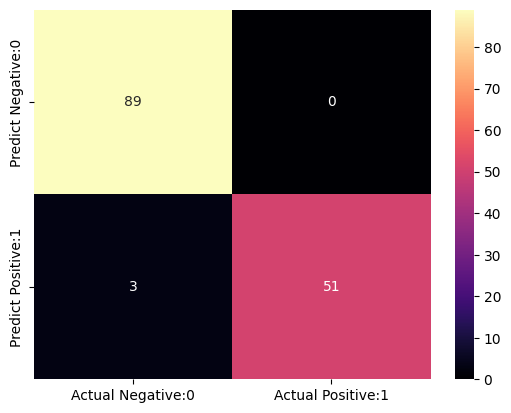

In [56]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='magma')

**The confusion matrix tells me that my model predicted malignant tumours with 100% accuracy.** In 3 cases, the model predicted that a tumour was malignant when it was benign, and in 51 cases it correctly predicted that the tumour was malignant. 

For a dataset predicting cancer, I would rather err on the side of a few false positives than a few false negatives. It is better for a patient to think a tumour could be malignant and then upon further testing find out it is benign, than for the cancer to go undetected. I'm quite happy with the way this first iteration of a logistic regression model operated.

## 5.5 Classification Report
I'll print a classification report to easily visualize the accuracy of the confusion matrix.

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.94      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



The classification report reiterates what I have discovered above.

**I would state that the model is 100% accurate in predicting if a tumour is malignant, and 97% accurate in predicting that it is benign.**

### Classification Accuracy and Error Metrics Explained

In [58]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [59]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9790


In [60]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0210


### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

In [61]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


### Recall
Recall is the ratio of True Positives to the sum of True Positives and False Negatives.

In [62]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9674


### False Positive Rate
False Positive Rate is the inverse of Recall. It is the ratio of False Positives to the sum of False Positives and True Negatives.

In [63]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


## 5.6 Investigating Predicted Probabilities

I'll look at the first 10 predicted probabilities of the two classes: benign and malignant.

In [64]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[7.67315635e-01, 2.32684365e-01],
       [3.75867662e-02, 9.62413234e-01],
       [1.71407883e-01, 8.28592117e-01],
       [9.25188514e-01, 7.48114860e-02],
       [9.62918000e-01, 3.70820004e-02],
       [4.30555080e-04, 9.99569445e-01],
       [1.55563358e-03, 9.98444366e-01],
       [2.81404974e-01, 7.18595026e-01],
       [5.05251901e-01, 4.94748099e-01],
       [8.93021761e-01, 1.06978239e-01]])

I store these values into a DataFrame so I can plot them easily.

In [65]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Benign Tumor (0)', 'Prob of Malignant Tumor (1)'])

y_pred_prob_df

,Prob of Benign Tumor (0),Prob of Malignant Tumor (1)
0,0.767316,0.232684
1,0.037587,0.962413
2,0.171408,0.828592
3,0.925189,0.074811
4,0.962918,0.037082
5,0.000431,0.999569
6,0.001556,0.998444
7,0.281405,0.718595
8,0.505252,0.494748
9,0.893022,0.106978


I print and store these first 10 predicted probabilities for Malignant cancer.

In [66]:
# print the first 10 predicted probabilities for class 1 - Probability of Malignant Tumor

logreg.predict_proba(X_test)[0:10, 1]

array([0.23268436, 0.96241323, 0.82859212, 0.07481149, 0.037082  ,
       0.99956944, 0.99844437, 0.71859503, 0.4947481 , 0.10697824])

In [67]:
# store the predicted probabilities for class 1 - Probability of Malignant Tumour

y_pred1 = logreg.predict_proba(X_test)[:, 1]

### Histogram of Predicted Probabilities
I select a histogram to easily visualize the predicted probabilities of benign or malignant cancer based on my model's predictions.

Text(0, 0.5, 'Frequency')

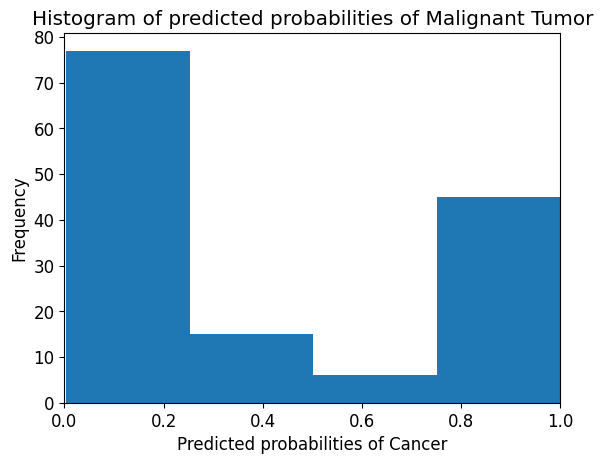

In [68]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 2 bins
plt.hist(y_pred1, bins = 4)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Malignant Tumor')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Cancer')
plt.ylabel('Frequency')

**Observations**
* The first column tell us that there are approximately 75 observations with very high probability that the tumor is benign
* The fourth column tell us that there are approximately 45 observations with very high probability that the tumor is malignant
* The model was less certain about approximately 20 tumors, but classified most of them correctly
* The model is much more likely to classify a tumor as benign or malignant with high probability than to be unsure of the classification

## 5.7 Cross Validation

I'll apply 5-fold cross validation to the model to see if it would improve the accuracy.

In [69]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.95348837 0.95294118 0.96470588 0.94117647 0.96470588]


In [70]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9554


The average cross validation score is lower. Cross-validation would not improve the accuracy of this model.

## 5.8 GridSearchCV

I'll import GridSearchCV and run it with the parameters we looked at earlier and see if it can determine an improvement to the model.

In [71]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [72]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9789


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, random_state=42, solver='liblinear')


**The model that yielded the best results in our model evaluation was a Logistic Regression model with parameters C=10 and solver='liblinear'.** 

**This is the model we will use to predict if a future tumour is malignant or benign.**

In [73]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9790


# Conclusion 

* The logistic regression model accuracy score is 0.9790. So, the model does an extremely good job in predicting whether or not the tumor is malignant.

* The model is 100% accurate in predicting if a tumor is malignant.

* The model is 97% accurate in predicting if a tumor is benign.

* The model shows no signs of overfitting.

* Increasing the value of C results in higher test set accuracy but slightly decreases the training set accuracy. So, we can conclude that a more complex model might slightly overfit.

* Our, original model score is found to be 0.9790. The average cross-validation score is 0.9554. So, we can conclude that cross-validation does not result in performance improvement.

* Our original model test accuracy is 0.9790 while GridSearch CV accuracy is 0.9790. We can see that GridSearch CV did not improve the performance for this particular model. It confirmed that our model was equally accurate.

* 54/143 of observations predict that the tumor is malignant. 89/143 of observations predict that the tumor is benign.

<div>
<img src='https://breastcancerfoundation.ky/wp-content/uploads/2017/10/thank-you-1.jpg' width='500'/>
</div>

**If you found this notebook helpful please consider upvoting, and please don't hesitate to comment on any of my notebooks!**